In [1]:
#1 Importando librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#2 Importando el dataset
dataset = pd.read_csv('GOOGL.csv')
X = dataset.iloc[:,4:5].values
y = dataset.iloc[:,6:7].values

In [3]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4382,2022-01-13,2830.800049,2857.000000,2768.179932,2771.739990,2771.739990,1571800
4383,2022-01-14,2741.580078,2814.840088,2739.969971,2789.610107,2789.610107,1482100
4384,2022-01-18,2723.500000,2742.629883,2708.770020,2719.959961,2719.959961,1743600
4385,2022-01-19,2730.469971,2759.189941,2700.310059,2702.330078,2702.330078,1432400


In [4]:
# Ajustes de escalas
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [6]:
# prediccion de un nuevo valor
x_trans = sc_X.transform([[48.57373]])
y_pred = regressor.predict(x_trans)
y_pred = sc_y.inverse_transform(y_pred)

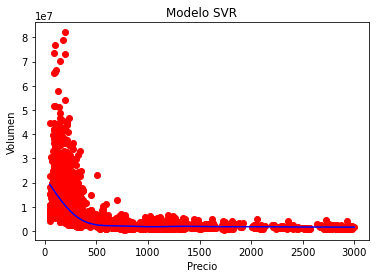

In [7]:
#Graficando los valores reales
x_real = sc_X.inverse_transform(X)
y_real = sc_y.inverse_transform(y)

X_grid = np.arange(min(x_real), max(x_real), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))

x_grid_transform = sc_X.transform(X_grid)

y_grid = regressor.predict(x_grid_transform)
y_grid_real = sc_y.inverse_transform(y_grid)

plt.scatter(x_real, y_real, color = 'red')
plt.plot(X_grid, y_grid_real, color = 'blue')
plt.title('Modelo SVR')
plt.xlabel('Precio')
plt.ylabel('Volumen')
plt.show()